<a href="https://colab.research.google.com/github/Mahadev5/Parametric_Soybean/blob/main/Soybean%20Parametric%20Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library importing

In [41]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

!pip install netCDF4
import netCDF4 as Dataset
import numpy as np

Testing NCF dataset

In [8]:
file_2022='/home/RF25_ind2022_rfp25.nc'
rainfall_2022 = netCDF4.Dataset(file_2022, 'r')
print(rainfall_2022)

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.5 (optimized) 20-Jan-23
    Conventions: CF-1.6
    dimensions(sizes): LONGITUDE(135), LATITUDE(129), TIME(365)
    variables(dimensions): float64 LONGITUDE(LONGITUDE), float64 LATITUDE(LATITUDE), float64 TIME(TIME), float64 RAINFALL(TIME, LATITUDE, LONGITUDE)
    groups: 


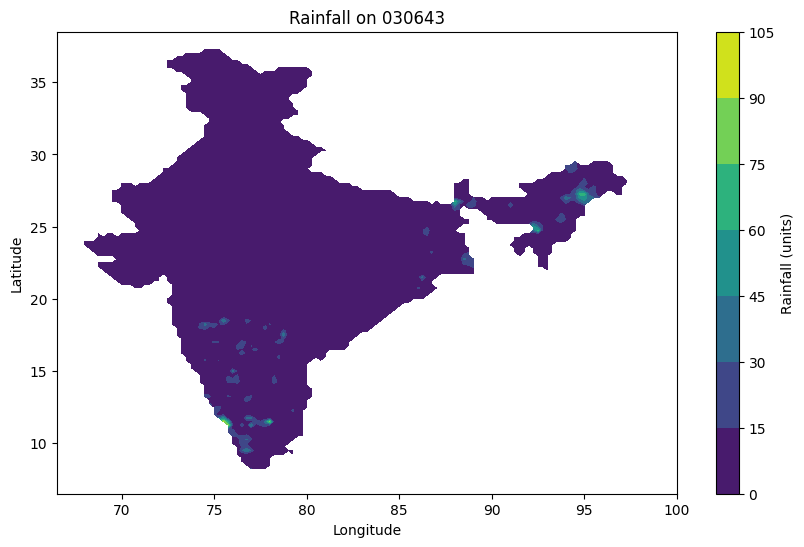

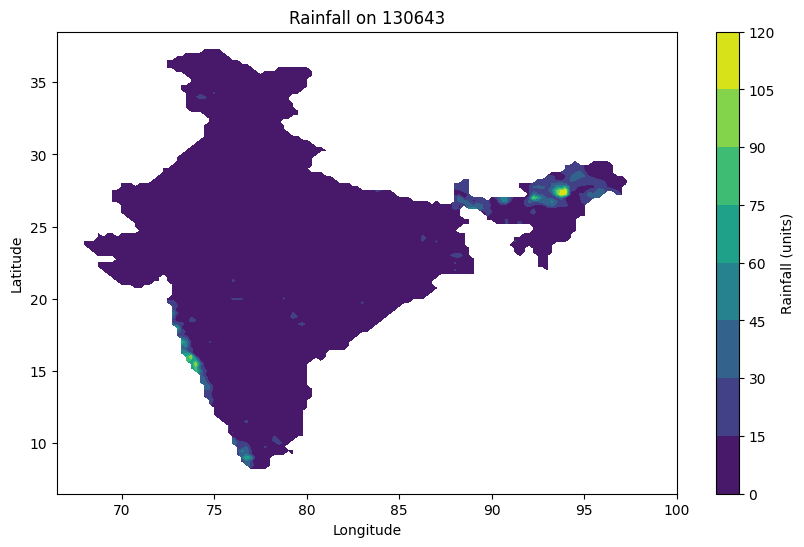

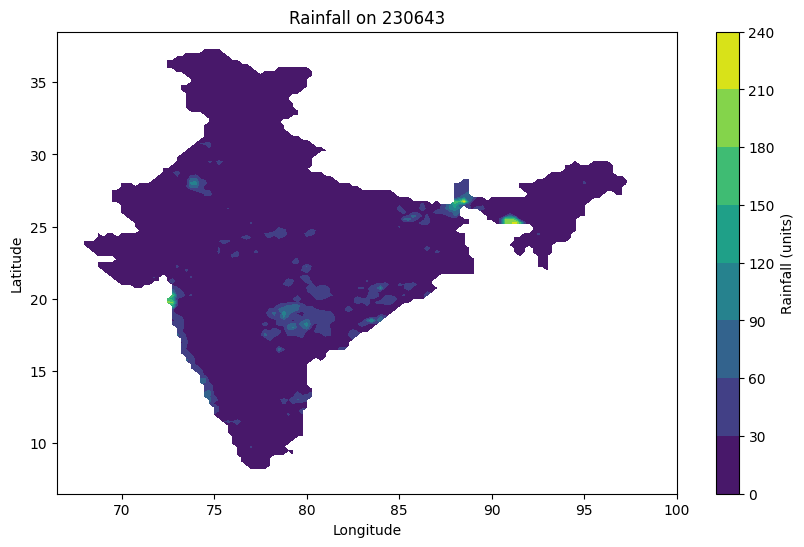

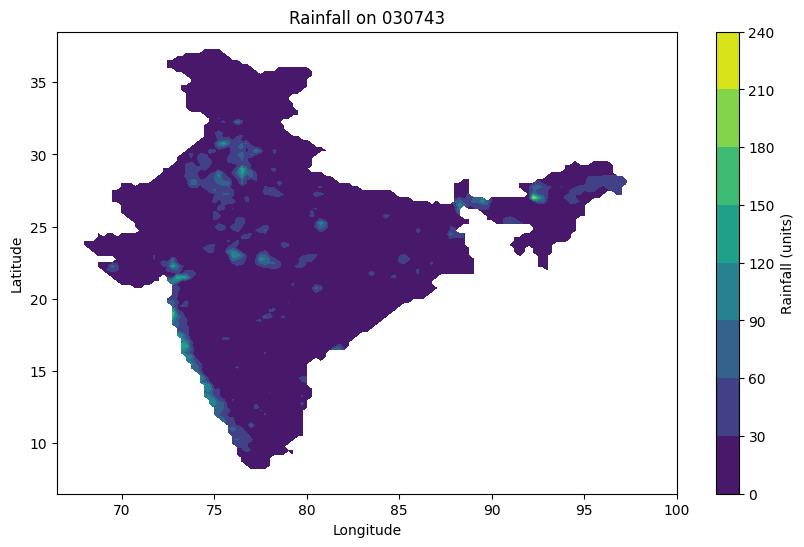

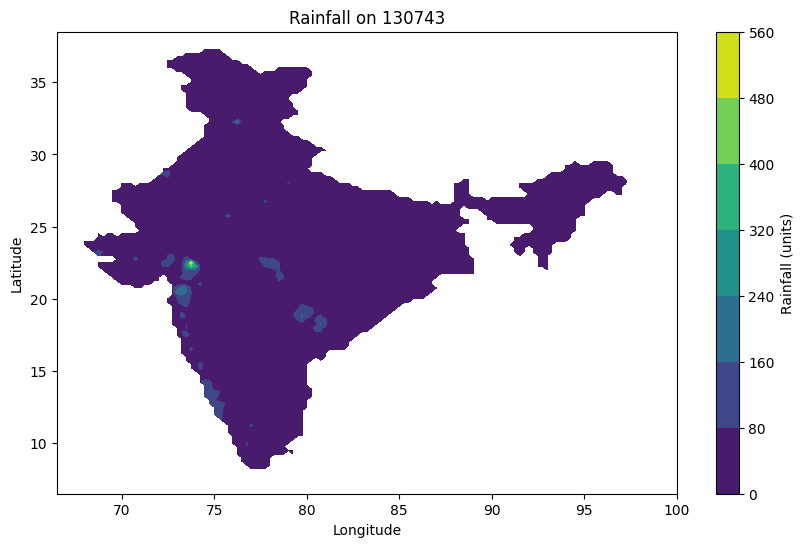

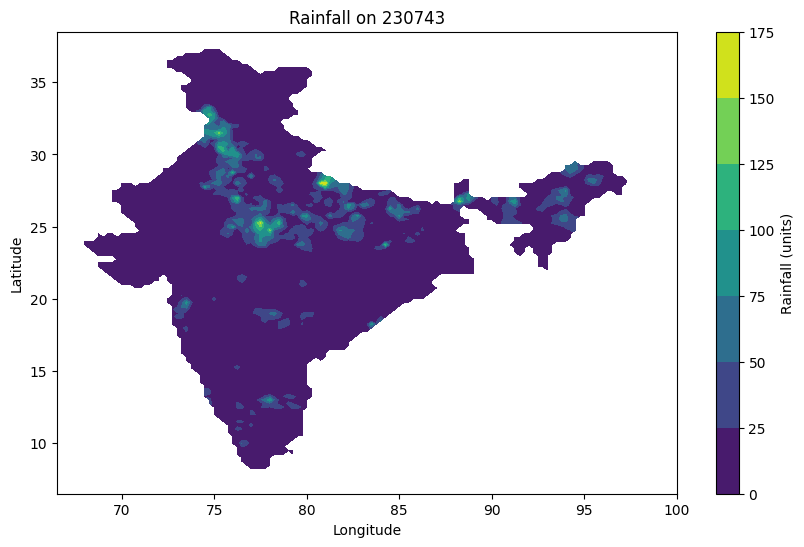

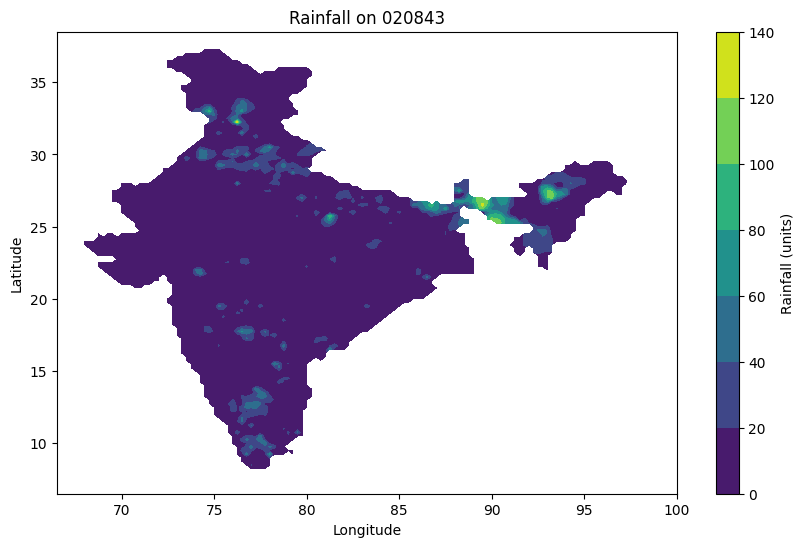

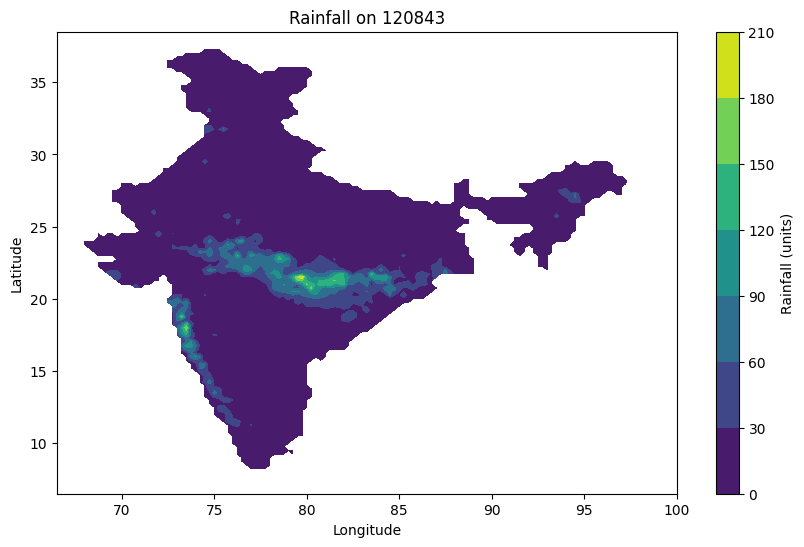

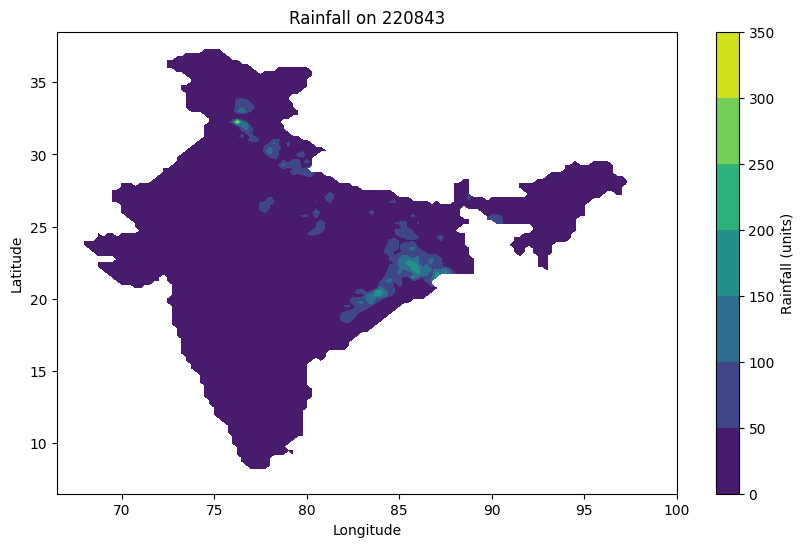

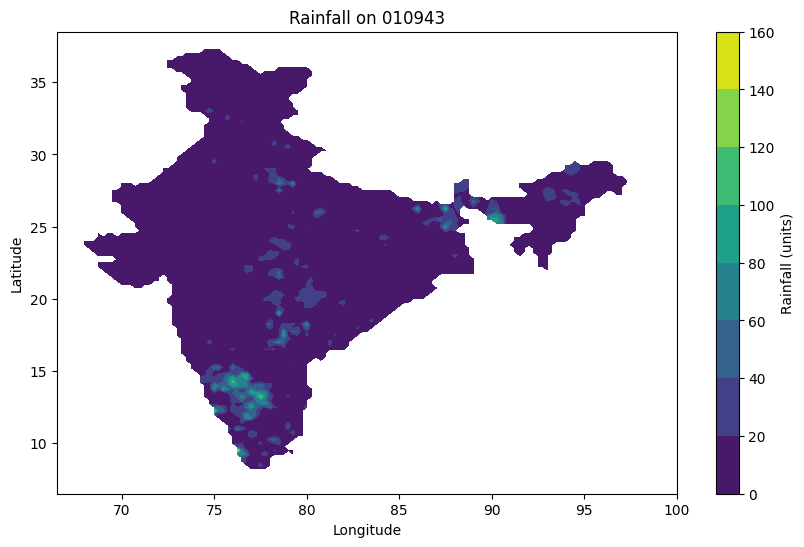

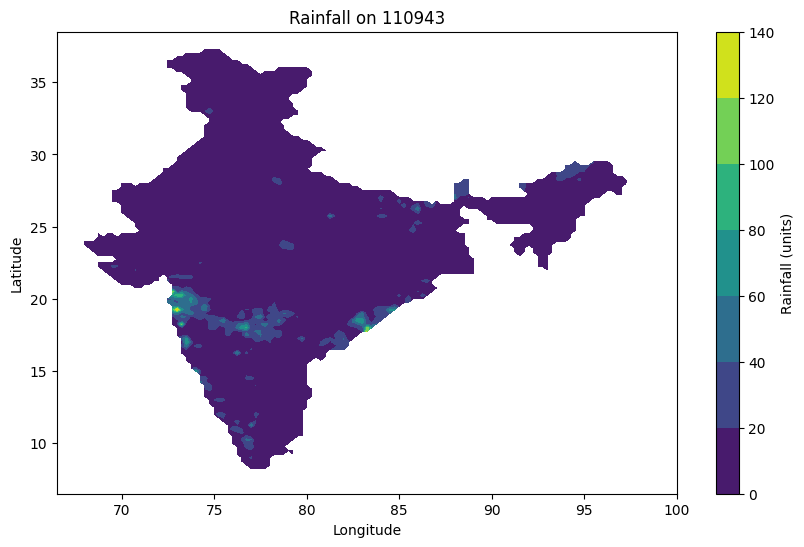

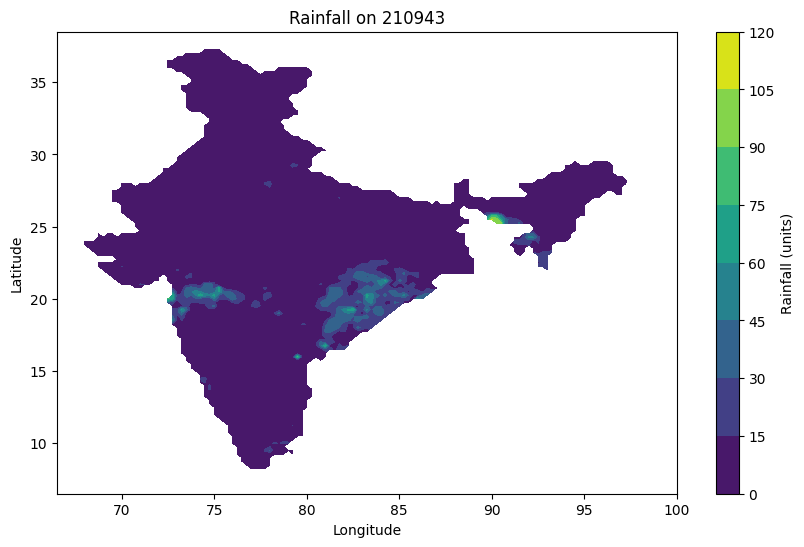

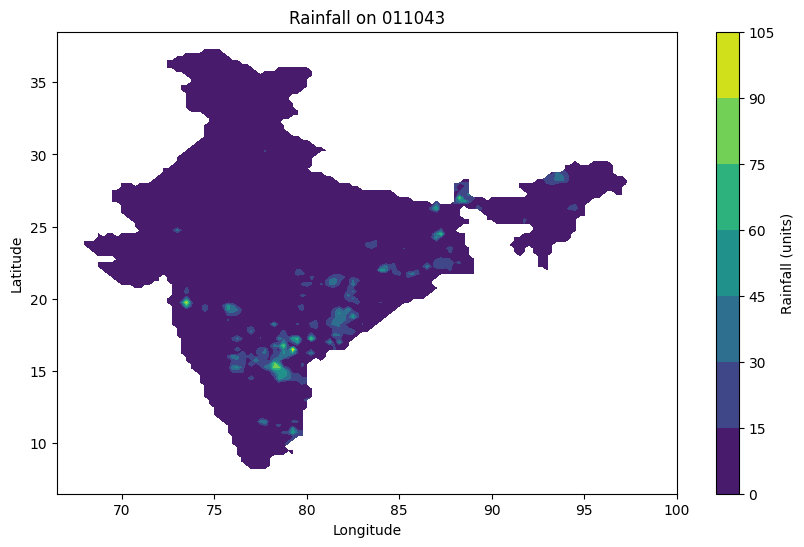

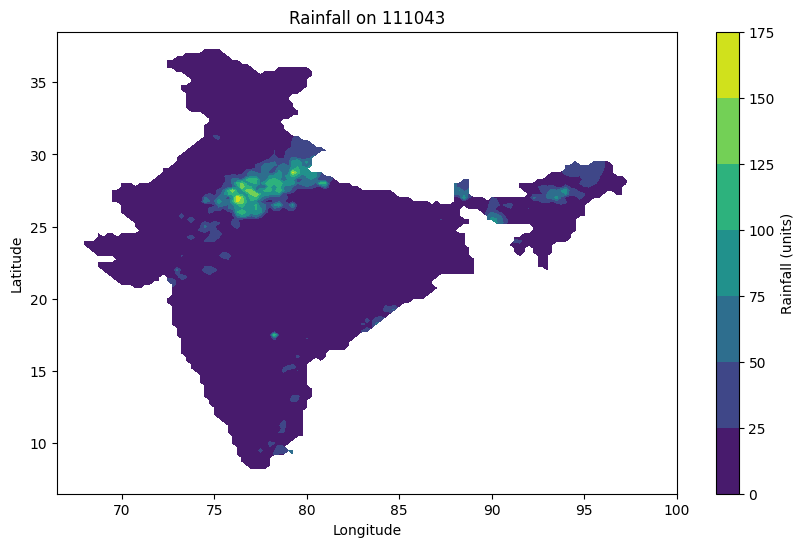

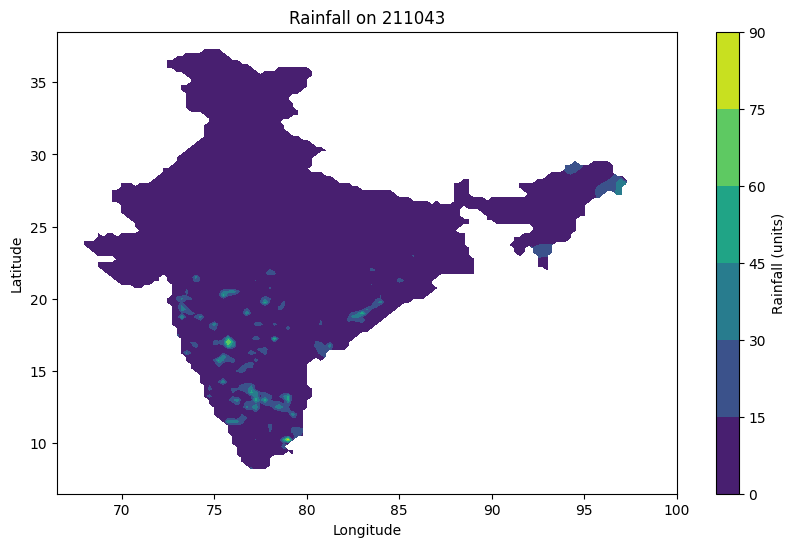

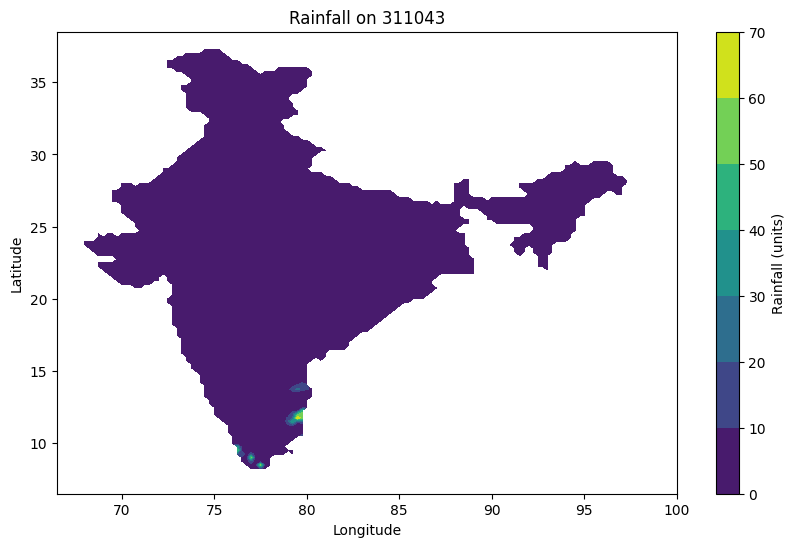

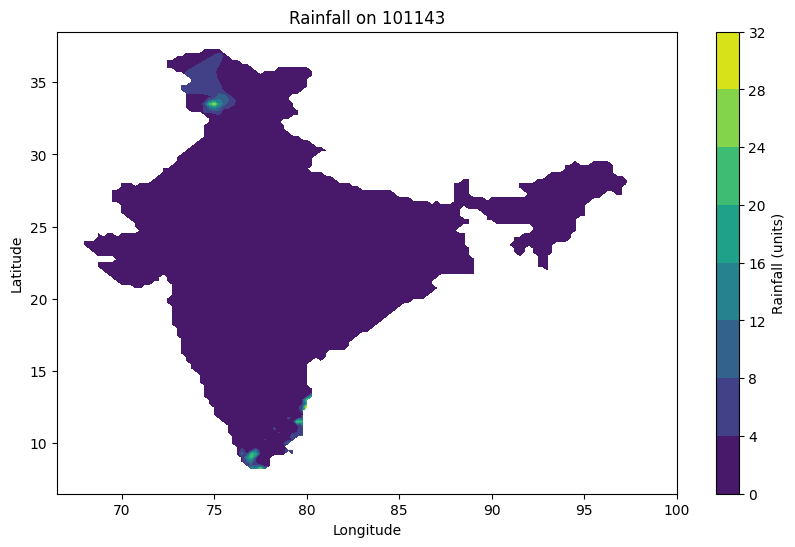

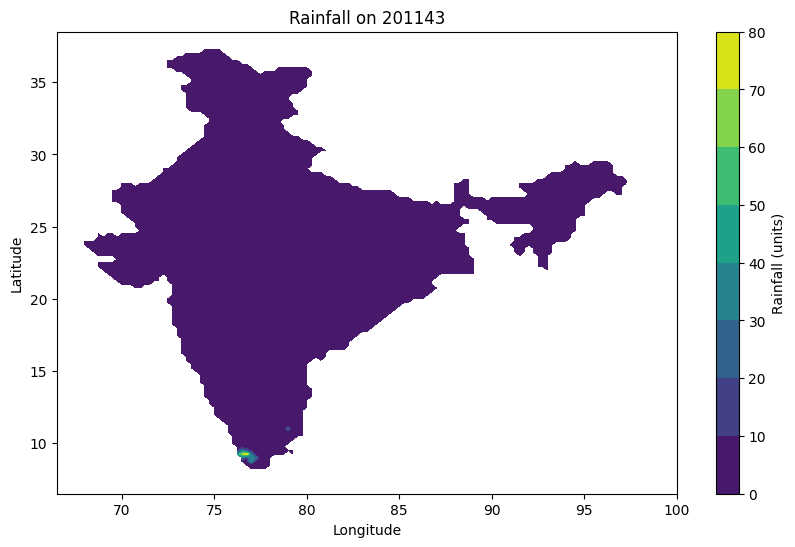

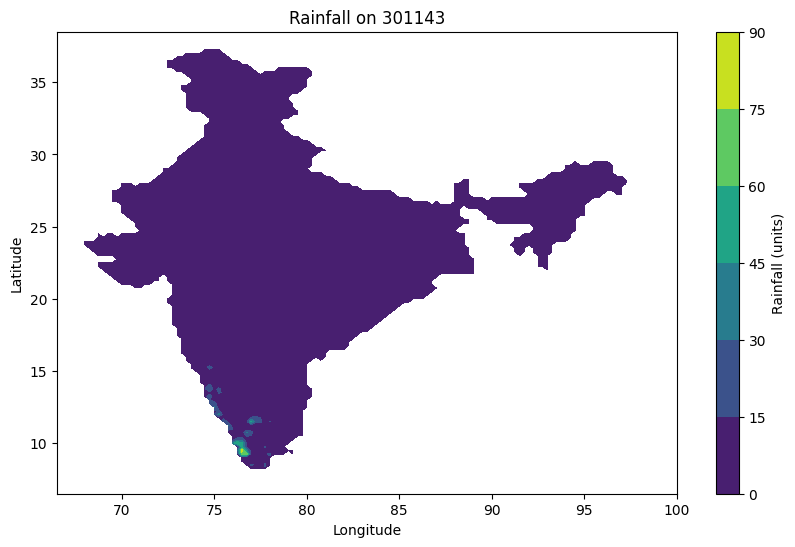

In [58]:
# Extract necessary variables
longitude = rainfall_2022.variables['LONGITUDE'][:]
latitude = rainfall_2022.variables['LATITUDE'][:]
time = rainfall_2022.variables['TIME'][:]

rainfall = rainfall_2022.variables['RAINFALL'][:]

# Define the start and end dates (June 1st to November 30th, 2022)
start_date = datetime(2022, 6, 1)
end_date = datetime(2022, 11, 30)

# Calculate the number of days since 01-Jan-2022
start_day = (start_date - datetime(2022, 1, 1)).days
end_day = (end_date - datetime(2022, 1, 1)).days

# Create a list of time indices for every 5th day between June 15 and November 30
time_indices = np.arange(start_day, end_day, 10)

# Plot the rainfall data for each of the 10-day intervals
for idx in time_indices:
    if idx < len(time):  # Check if index is within the available time range
        rainfall_day = rainfall[idx, :, :]  # Extract rainfall data for the current time step

        # Convert the day index to a datetime object
        plot_date = datetime(2022, 1, 1) + timedelta(days=time[idx])

        # Format the date to 'ddmmyy'
        formatted_date = plot_date.strftime('%d%m%y')

        # Plot the rainfall for the current 10-day interval
        plt.figure(figsize=(10, 6))
        plt.contourf(longitude, latitude, rainfall_day, cmap='viridis')
        plt.colorbar(label='Rainfall (units)')  # Adjust units as per your dataset
        plt.title(f"Rainfall on {formatted_date}")
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

In [54]:
print(rainfall[0])

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
